In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import re

**LOAD DATASET**

In [ ]:
data_frame = pd.read_csv('/player_regular_season.csv')

print("dataset for player_regular_season\n",data_frame)
data_frame2 = pd.read_csv('/player_regular_season_career.csv')
print("\ndataset for player_regular_season_career\n",data_frame2)

dataset for player_regular_season
            ilkid  year firstname   lastname team  ...  fgm  fta  ftm  tpa  tpm
0      ABRAMJO01  1946      John  Abramovic  PIT  ...  202  178  123    0    0
1      AUBUCCH01  1946      Chet   Aubuchon  DE1  ...   23   35   19    0    0
2      BAKERNO01  1946      Norm      Baker  CH1  ...    0    0    0    0    0
3      BALTIHE01  1946  Herschel  Baltimore  ST1  ...   53   69   32    0    0
4       BARRJO01  1946      John       Barr  ST1  ...  124   79   47    0    0
...          ...   ...       ...        ...  ...  ...  ...  ...  ...  ...  ...
19107  WILLISC01  2004     Scott   Williams  CLE  ...   12   11    9    1    0
19108  WOODSLO01  2004     Loren      Woods  TOR  ...   71   59   34    1    0
19109  WOODSQY01  2004    Qyntel      Woods  MIA  ...    5    0    0    0    0
19110  WRIGHDO01  2004    Dorell     Wright  MIA  ...    3    1    1    4    0
19111  WRIGHLO02  2004  Lorenzen     Wright  MEM  ...  320  198  131    3    0

[19112 rows x 23

**FINDING BEST FEATURES**

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
orig_features = ['gp','minutes','pts','oreb','dreb','reb','asts','stl','blk','turnover','pf','fga','fgm','fta','tpa','tpm']
data = data_frame2[orig_features]



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**CORRELATION=PEARSON**

In [ ]:
#correlation of attributes
correlation_matrix = data_frame.corr(method="pearson")
correlation_matrix["tpa"].sort_values()

blk         0.032797
reb         0.054542
oreb        0.089066
pf          0.146810
fta         0.191575
dreb        0.206747
ftm         0.223989
gp          0.266815
fgm         0.300016
year        0.330427
fga         0.330877
pts         0.335818
minutes     0.358111
asts        0.385284
turnover    0.421903
stl         0.440646
tpm         0.990170
tpa         1.000000
Name: tpa, dtype: float64

**CORRELATION=KENDALL**

In [ ]:
#correlation of attributes
correlation_matrix = data_frame.corr(method="kendall")
correlation_matrix["tpa"].sort_values()

pf          0.105821
reb         0.119711
fta         0.138262
ftm         0.160443
gp          0.195583
fga         0.208083
fgm         0.214261
pts         0.222041
minutes     0.258956
asts        0.277170
oreb        0.287656
blk         0.287689
dreb        0.355543
year        0.421682
stl         0.460707
turnover    0.546221
tpm         0.853288
tpa         1.000000
Name: tpa, dtype: float64

**CORRELATION=SPEARMAN**

In [ ]:
#correlation of attributes
correlation_matrix = data_frame.corr(method="spearman")
correlation_matrix["tpa"].sort_values()

pf          0.141437
reb         0.157409
fta         0.187125
ftm         0.216974
gp          0.266326
fga         0.277249
fgm         0.289180
pts         0.298638
minutes     0.342218
asts        0.369583
blk         0.384940
oreb        0.385713
dreb        0.465885
year        0.560159
stl         0.583992
turnover    0.697507
tpm         0.907927
tpa         1.000000
Name: tpa, dtype: float64

**PLOTTING**

In [ ]:
scaler = StandardScaler()
transformed = scaler.fit_transform(data)
pca = PCA(n_components=1)
decomposed = pca.fit_transform(data)

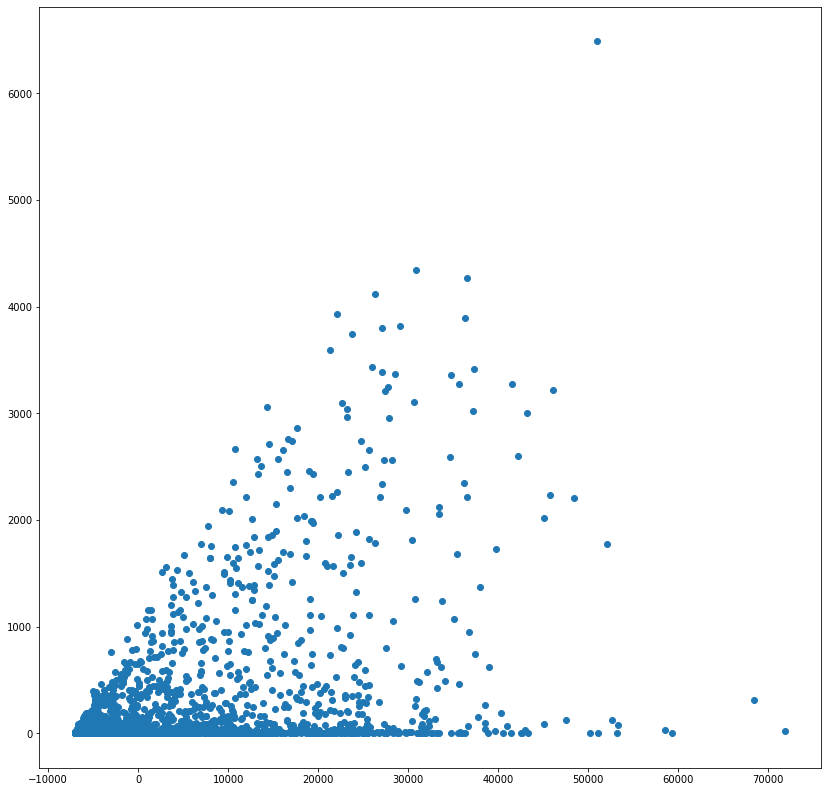

In [ ]:
plt.figure(figsize=(14, 14))
plt.scatter(decomposed, data_frame2.tpa)

Text(0.5, 0, 'total points added')

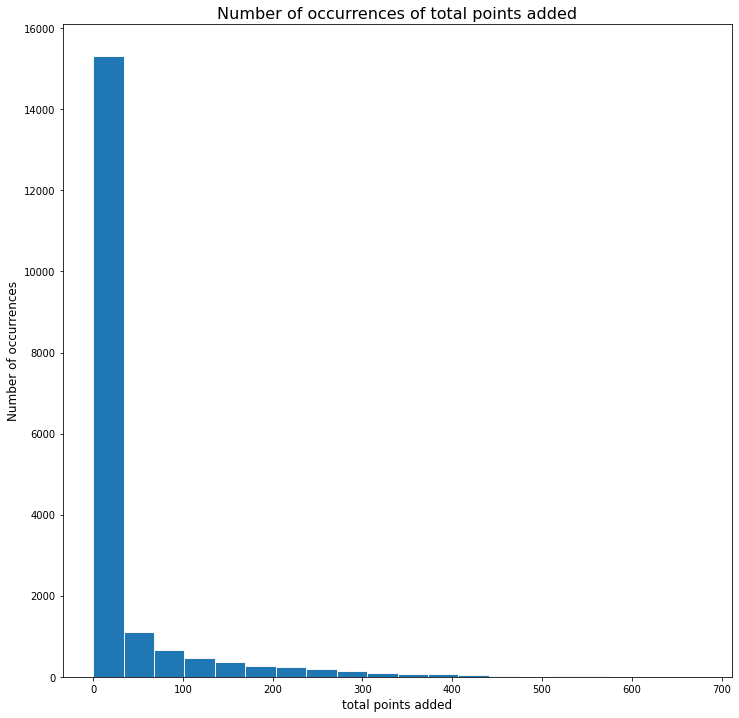

In [ ]:
plt.figure(figsize=(12, 12))

plt.hist(data_frame.tpa, bins=20, edgecolor='#F5F5F5')
plt.title("Number of occurrences of total points added", size=16)
plt.ylabel("Number of occurrences", size=12)
plt.xlabel("total points added", size=12)

In [ ]:

from sklearn.preprocessing import PolynomialFeatures, normalize, StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.utils import shuffle

**FIND MVP PER YEAR**

In [ ]:
def find_mvp(yr):
  pname_totScore= data_frame[data_frame['year']==yr]
  pname_totScore = pname_totScore[['firstname','lastname','tpa']]
  pname_totScore = pname_totScore.sort_values(by=['tpa'], ascending=False)
  return pname_totScore.iloc[0]

In [ ]:
for i in range(1946,2005):
  print("MVP for year ", i, " is:" )
  print(find_mvp(2003))
  print()

MVP for year  1946  is:
firstname    Baron
lastname     Davis
tpa            582
Name: 18076, dtype: object

MVP for year  1947  is:
firstname    Baron
lastname     Davis
tpa            582
Name: 18076, dtype: object

MVP for year  1948  is:
firstname    Baron
lastname     Davis
tpa            582
Name: 18076, dtype: object

MVP for year  1949  is:
firstname    Baron
lastname     Davis
tpa            582
Name: 18076, dtype: object

MVP for year  1950  is:
firstname    Baron
lastname     Davis
tpa            582
Name: 18076, dtype: object

MVP for year  1951  is:
firstname    Baron
lastname     Davis
tpa            582
Name: 18076, dtype: object

MVP for year  1952  is:
firstname    Baron
lastname     Davis
tpa            582
Name: 18076, dtype: object

MVP for year  1953  is:
firstname    Baron
lastname     Davis
tpa            582
Name: 18076, dtype: object

MVP for year  1954  is:
firstname    Baron
lastname     Davis
tpa            582
Name: 18076, dtype: object

MVP for year  1955 

**MVP CAREERWISE**

In [ ]:
top_player_career = data_frame2[['firstname','lastname','tpa']]
top_player_career= top_player_career.sort_values(by=['tpa'],ascending=False)
print("top MVP career wise is:\n",top_player_career.iloc[0])



top MVP career wise is:
 firstname    Reggie
lastname     Miller
tpa            6486
Name: 2275, dtype: object
